In [38]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # to adsjust trhe configuration of the plots we will create

# read in the data
df = pd.read_csv(r'C:\Users\zamee\OneDrive\Desktop\projects2024\movies.csv')



In [147]:
# lets looks at the data 

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,Dece,162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,Apri,181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,Dece,194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Dece,138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,Apri,149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


In [54]:
# lets see for the miossing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [56]:
# data types for all columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [61]:
# change the data types

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')



In [62]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [148]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,Dece,162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,Apri,181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,Dece,194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Dece,138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,Apri,149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


In [67]:
# matches the values of two columns with a new column 
df['yearcorrect'] = df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,June,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,July,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,July,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,July,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,Octo,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,Febr,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,Apri,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,Octo,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,Octo


In [149]:
# drop the unuse column.

df = df.drop('yearcorrect', axis=1)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,Dece,162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,Apri,181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,Dece,194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Dece,138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,Apri,149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018


In [71]:
# matches the values of two columns with a new column 
df['yearcorrect'] = df['year'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,June,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,July,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,July,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,July,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,Octo,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,Febr,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,Apri,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,Octo,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [74]:
# sort the values in descending order in using gross column .

df.sort_values(by=['gross'], inplace=False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,Dece,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,Apri,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,Dece,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,Dece,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,Apri,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,Janu,4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1989
1614,Edge of Sanity,R,Horror,1989,Apri,5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,Apri,6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,Janu,7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1989


In [76]:
pd.set_option('display.max_rows', None)

In [90]:
df = df.sort_values(by=['gross'], inplace=False, ascending = False)

In [81]:
# drop any duplicates

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [150]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,Dece,162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,Apri,181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,Dece,194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Dece,138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,Apri,149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018


In [ ]:
# budget high correlation
# company high correlation



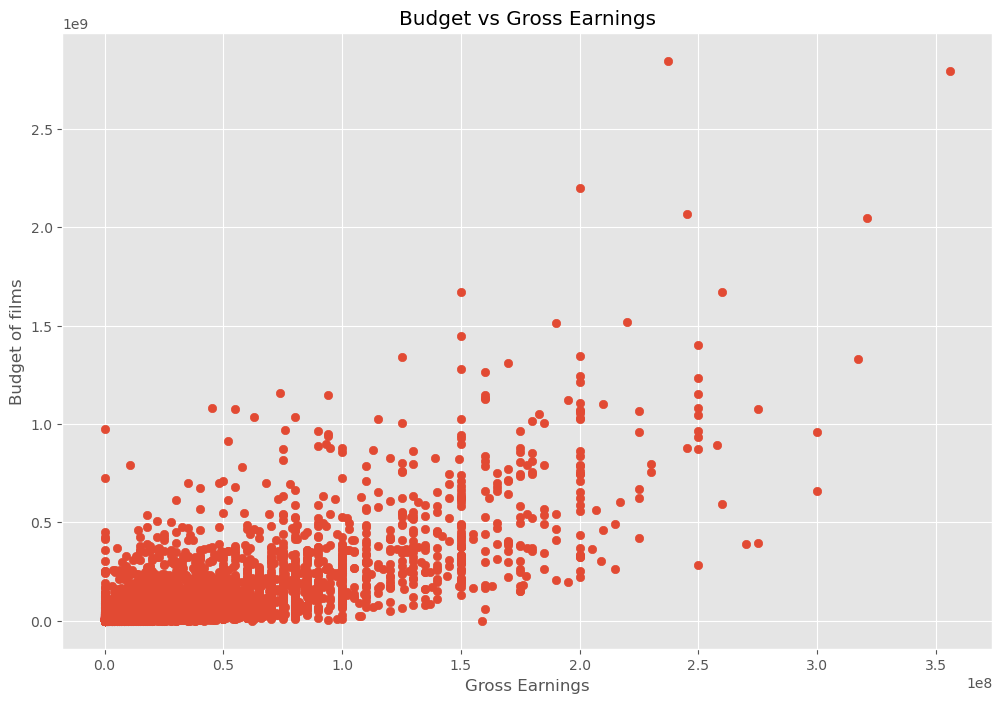

In [93]:
# scatter plot with budget vs  gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget of films')
plt.show()

In [151]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,Dece,162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,Apri,181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,Dece,194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Dece,138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,Apri,149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018


<Axes: xlabel='budget', ylabel='gross'>

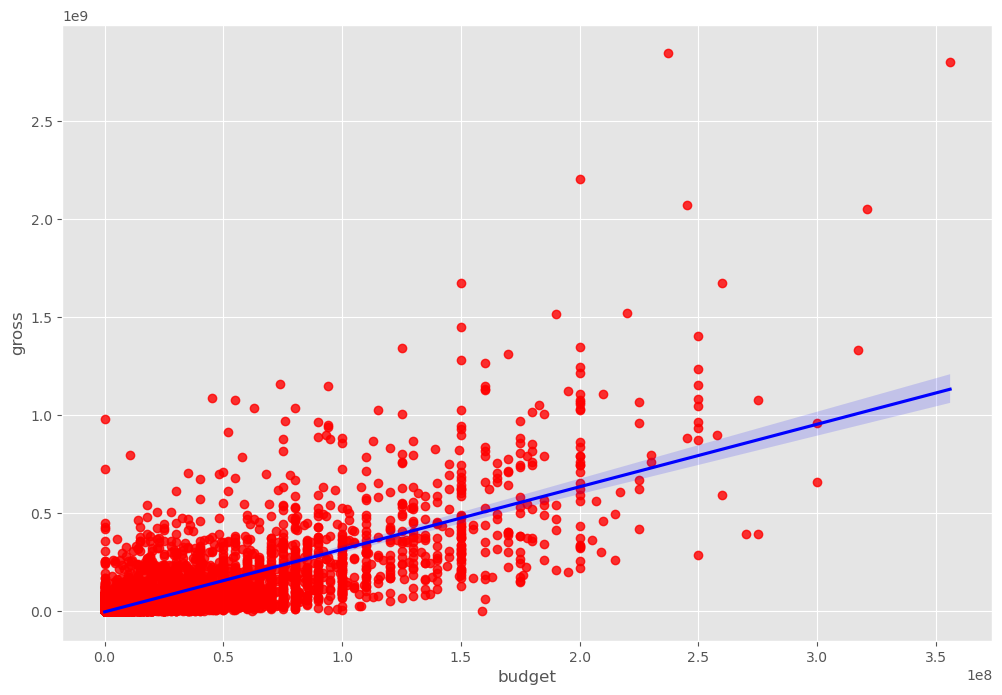

In [108]:
# plot budget vs gross using seaborn
# Corrected code using x and y arguments
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})




In [ ]:
# let's start looking at correlation

In [125]:
df.corr(method = 'pearson')  #pearson, kendall, spearman (linear correlation, ranl correlation, rank order correlation)

C:\Users\zamee\AppData\Local\Temp\ipykernel_56920\2885596720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')  #pearson, kendall, spearman


,budget,gross,runtime,score,votes,year
budget,1.000000,0.750157,0.269510,0.055665,0.486862,0.309212
gross,0.750157,1.000000,0.245235,0.186392,0.632834,0.261900
runtime,0.269510,0.245235,1.000000,0.399451,0.309212,0.120811
score,0.055665,0.186392,0.399451,1.000000,0.409182,0.097995
votes,0.486862,0.632834,0.309212,0.409182,1.000000,0.222945
year,0.309212,0.261900,0.120811,0.097995,0.222945,1.000000


In [120]:
# to assign the column in alphabetically order 

df = df[sorted(df.columns)]

In [ ]:
# high correlation between budgte and gross
# i was right

C:\Users\zamee\AppData\Local\Temp\ipykernel_56920\1863127649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


<function matplotlib.pyplot.show(close=None, block=None)>

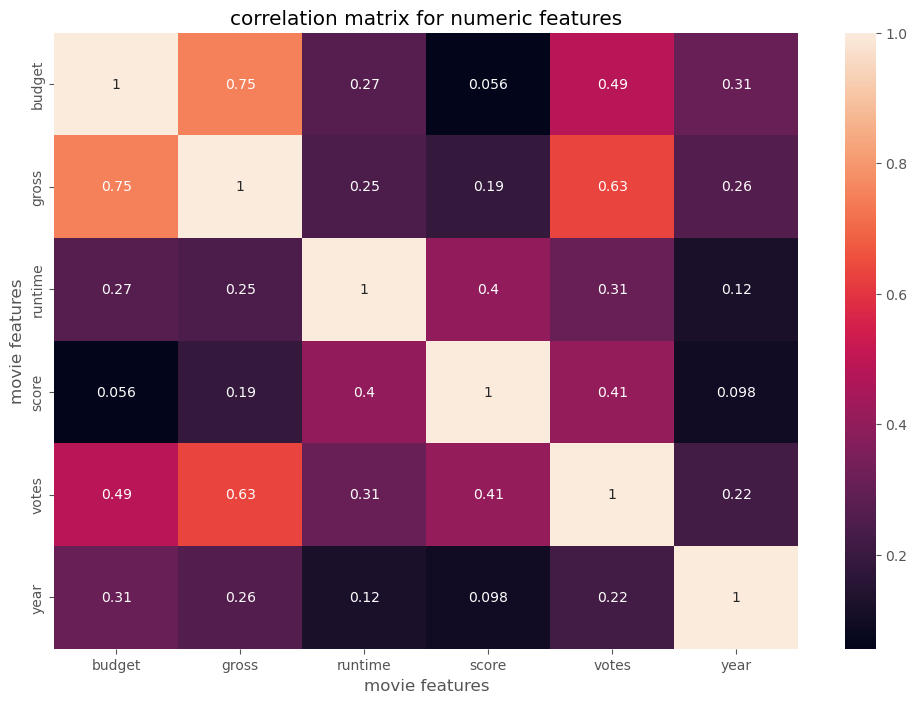

In [129]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation matrix for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show

In [130]:
# looks at company 

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,Dece,162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,Apri,181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,Dece,194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Dece,138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,Apri,149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


In [132]:
df_numerized = df

for col_name in df.numerized_columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
        df_numerizerd
        
        # make the copy of the data frame to numerized the columns
        

AttributeError: 'DataFrame' object has no attribute 'numerized_columns'

In [145]:
# Create a copy of df to numerize columns
df_numerized = df.copy()

# Loop through each column in the DataFrame
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':  # Check if the column is of type object
        df_numerized[col_name] = df_numerized[col_name].astype('category')  # Convert to category
        df_numerized[col_name] = df_numerized[col_name].cat.codes  # Assign numerical codes

# Display the numerized DataFrame
df_numerized.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,2253,55,1155,0,2847246203,533,5,10,162.0,7.8,2334,1100000.0,1778,2009,29
7445,356000000,1606,55,162,0,2797501328,535,5,8,181.0,8.4,2241,903000.0,743,2019,39
3045,200000000,2253,55,1155,6,2201647264,6896,5,10,194.0,7.8,1595,1100000.0,1778,1997,17
6663,245000000,1540,55,1125,0,2069521700,5144,5,10,138.0,7.8,524,876000.0,2550,2015,35
7244,321000000,1606,55,162,0,2048359754,536,5,8,149.0,8.4,2241,897000.0,743,2018,38


In [146]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,Dece,162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,Apri,181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,Dece,194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Dece,138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,Apri,149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


<function matplotlib.pyplot.show(close=None, block=None)>

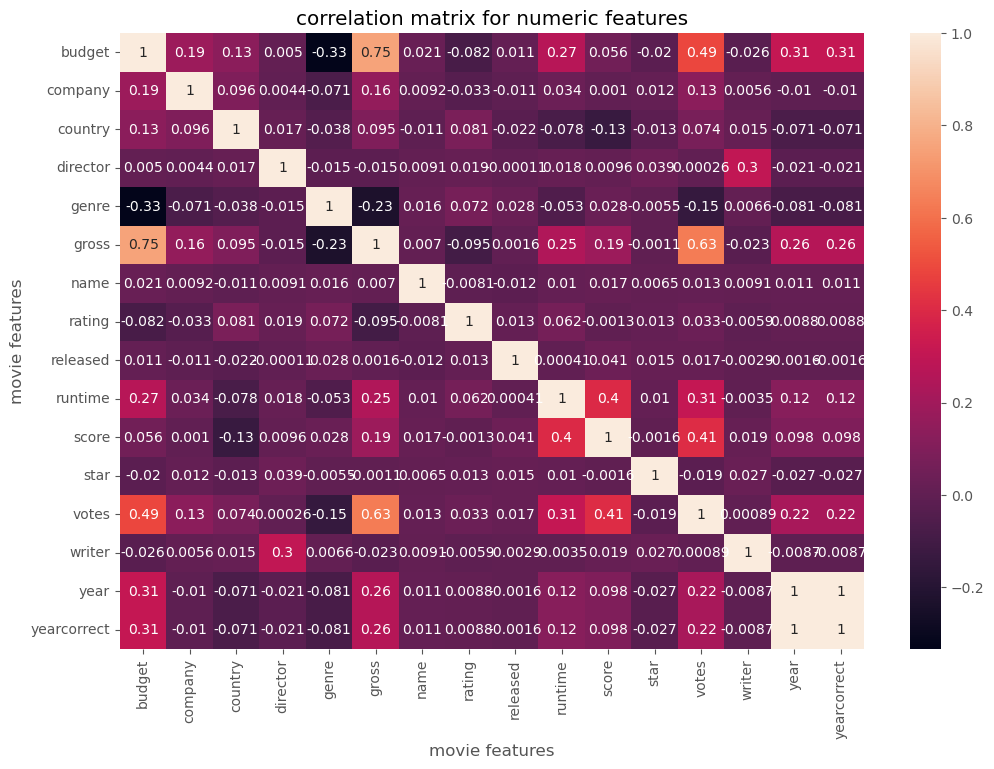

In [136]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('correlation matrix for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show

In [138]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.186474,0.131720,0.004976,-0.334021,0.750157,0.020548,-0.081939,0.010544,0.269510,0.055665,-0.019952,0.486862,-0.025911,0.309212,0.309212
company,0.186474,1.000000,0.095548,0.004404,-0.071067,0.156745,0.009211,-0.032943,-0.010726,0.034402,0.001030,0.012442,0.133204,0.005646,-0.010431,-0.010431
country,0.131720,0.095548,1.000000,0.017490,-0.037615,0.095325,-0.010737,0.081244,-0.022277,-0.078412,-0.133348,-0.012998,0.073625,0.015343,-0.070938,-0.070938
director,0.004976,0.004404,0.017490,1.000000,-0.015258,-0.014916,0.009079,0.019483,-0.000105,0.017624,0.009559,0.039234,0.000260,0.299067,-0.020795,-0.020795
genre,-0.334021,-0.071067,-0.037615,-0.015258,1.000000,-0.234297,0.016355,0.072423,0.028397,-0.052711,0.027965,-0.005477,-0.145307,0.006567,-0.081261,-0.081261
gross,0.750157,0.156745,0.095325,-0.014916,-0.234297,1.000000,0.006989,-0.095450,0.001606,0.245235,0.186392,-0.001129,0.632834,-0.022997,0.261900,0.261900
name,0.020548,0.009211,-0.010737,0.009079,0.016355,0.006989,1.000000,-0.008069,-0.011725,0.010392,0.017097,0.006472,0.013088,0.009081,0.011453,0.011453
rating,-0.081939,-0.032943,0.081244,0.019483,0.072423,-0.095450,-0.008069,1.000000,0.013475,0.062145,-0.001314,0.013405,0.033225,-0.005921,0.008779,0.008779
released,0.010544,-0.010726,-0.022277,-0.000105,0.028397,0.001606,-0.011725,0.013475,1.000000,0.000410,0.040993,0.015406,0.017337,-0.002892,-0.001562,-0.001562
runtime,0.269510,0.034402,-0.078412,0.017624,-0.052711,0.245235,0.010392,0.062145,0.000410,1.000000,0.399451,0.010174,0.309212,-0.003511,0.120811,0.120811


In [139]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.186474
             country        0.131720
             director       0.004976
             genre         -0.334021
             gross          0.750157
             name           0.020548
             rating        -0.081939
             released       0.010544
             runtime        0.269510
             score          0.055665
             star          -0.019952
             votes          0.486862
             writer        -0.025911
             year           0.309212
             yearcorrect    0.309212
company      budget         0.186474
             company        1.000000
             country        0.095548
             director       0.004404
             genre         -0.071067
             gross          0.156745
             name           0.009211
             rating        -0.032943
             released      -0.010726
             runtime        0.034402
             score          0.001030
 

In [140]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145307
votes        genre         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
rating       budget        -0.081939
budget       rating        -0.081939
year         genre         -0.081261
genre        year          -0.081261
yearcorrect  genre         -0.081261
genre        yearcorrect   -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
genre        company       -0.071067
company      genre         -0.071067
yearcorrect  country       -0.070938
country      yearcorrect   -0.070938
             year          -0.070938
year         country       -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
country      genre         -0.037615
g

In [144]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.632834
gross        votes          0.632834
budget       gross          0.750157
gross        budget         0.750157
budget       budget         1.000000
rating       rating         1.000000
company      company        1.000000
country      country        1.000000
director     director       1.000000
genre        genre          1.000000
gross        gross          1.000000
name         name           1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
released     released       1.000000
runtime      runtime        1.000000
score        score          1.000000
star         star           1.000000
votes        votes          1.000000
writer       writer         1.000000
yearcorrect  year           1.000000
year         yearcorrect    1.000000
dtype: float64

In [ ]:
# votes and budgets have the highest correlation to gross earnings

# company has low correlatio
# i was wrong